### Logistic regression 

In [ ]:
# Use built in dataset to perform logistic regression
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)

# Test the classifier
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Input a test point to predict class
test_point = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict the class of the test point
predicted_class = log_reg.predict(test_point)

print(f"Predicted class: {iris.target_names[predicted_class][0]}")


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Create a dummy dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56, 29, 40, 24, 60],
    'BMI': [19.1, 28.4, 32.3, 24.2, 27.5, 30.9, 21.3, 29.6, 23.1, 31.8],
    'Smoker': [0, 1, 1, 0, 1, 1, 0, 0, 0, 1],  # 1 = Yes, 0 = No
    'ExerciseFreq': [3, 0, 1, 4, 0, 1, 3, 2, 4, 0],  # times per week
    'Diabetes': [0, 1, 1, 0, 1, 1, 0, 0, 0, 1]  # Target (1 = Diabetes, 0 = No Diabetes)
}

df = pd.DataFrame(data)

# Corrected selection of features and target
X = df[['Age', 'BMI', 'Smoker', 'ExerciseFreq']]  # double brackets needed here
y = df['Diabetes']  # specify the column directly

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression classifier
log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)

# Test predictions
y_pred = log_reg.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict class for a new sample (use appropriate values based on your dataset columns)
test_point = np.array([[30, 25.0, 0, 3]])  # Age=30, BMI=25, Non-smoker, exercises 3 times/week

# Predicting the class
predicted_class = log_reg.predict(test_point)
print(f"Predicted class for test point: {predicted_class[0]} (1=Diabetes, 0=No Diabetes)")

Accuracy: 0.50
Predicted class for test point: 0 (1=Diabetes, 0=No Diabetes)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


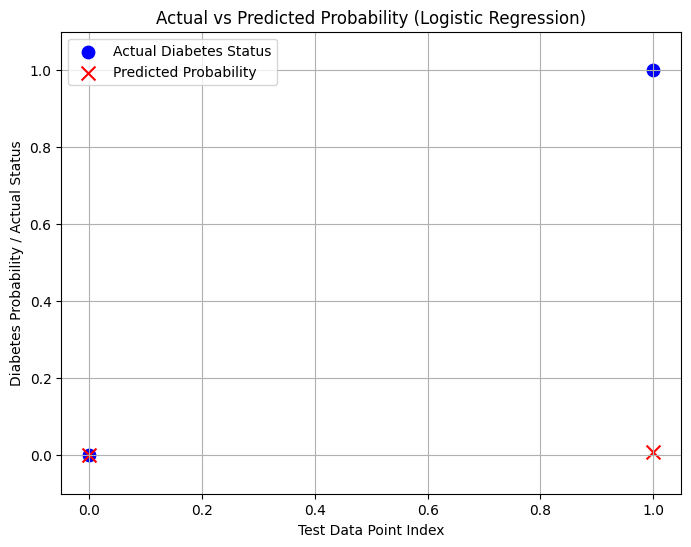

In [11]:
import matplotlib.pyplot as plt

# Get predicted probabilities on test data
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Plotting predicted probabilities
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Diabetes Status', s=80)
plt.scatter(range(len(y_pred_prob)), y_pred_prob, color='red', marker='x', label='Predicted Probability', s=100)

plt.xlabel('Test Data Point Index')
plt.ylabel('Diabetes Probability / Actual Status')
plt.title('Actual vs Predicted Probability (Logistic Regression)')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.3321
Epoch 200, Loss: 0.2417
Epoch 300, Loss: 0.2000
Epoch 400, Loss: 0.1752
Epoch 500, Loss: 0.1582
Epoch 600, Loss: 0.1457
Epoch 700, Loss: 0.1360
Epoch 800, Loss: 0.1281
Epoch 900, Loss: 0.1215

Final weights: [11.55868678]
Final bias: -5.7185


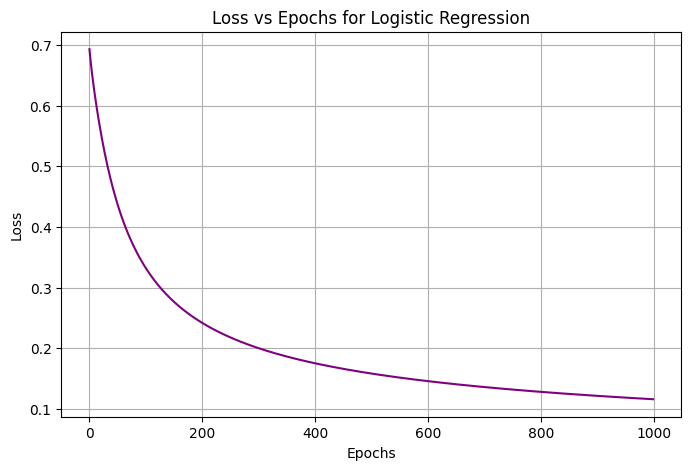

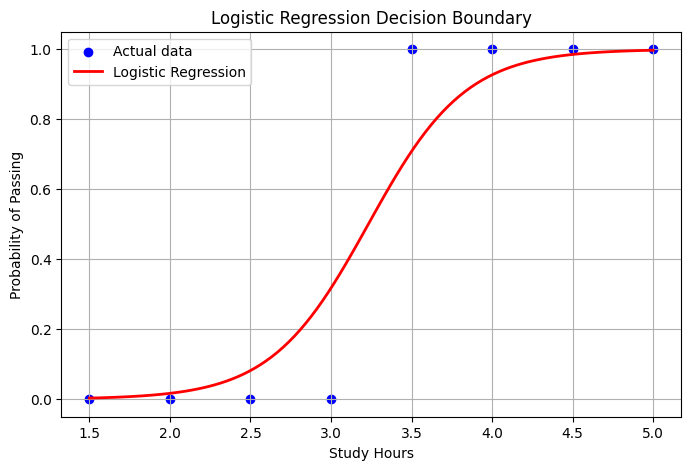

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy data
data = {
    "Student": ["A", "B", "C", "D", "E", "F", "G", "H"],
    "Study_Hours": [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    "Pass": [0, 0, 0, 0, 1, 1, 1, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Feature normalization (Min-Max normalization)
df['Study_Hours_Norm'] = (df['Study_Hours'] - df['Study_Hours'].min()) / (df['Study_Hours'].max() - df['Study_Hours'].min())

# Prepare features and labels
X = df[['Study_Hours_Norm']].values
y = df['Pass'].values.reshape(-1, 1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training function
def log_reg(x, y, lr=0.1, epochs=1000):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    losses = []

    for epoch in range(epochs):
        z = np.dot(x, w) + b
        y_pred = sigmoid(z)

        error = y_pred - y
        dw = np.dot(x.T, error) / m
        db = np.sum(error) / m

        w -= lr * dw
        b -= lr * db

        cost = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        losses.append(cost)

        # Optional: print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {cost:.4f}")

    return w, b, losses

# Train the logistic regression model
weights, bias, losses = log_reg(X, y, lr=0.5, epochs=1000)

# Results
print(f"\nFinal weights: {weights.flatten()}")
print(f"Final bias: {bias:.4f}")

# Plotting loss over epochs
plt.figure(figsize=(8,5))
plt.plot(losses, color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Logistic Regression")
plt.grid()
plt.show()

# Plotting decision boundary
plt.figure(figsize=(8,5))
plt.scatter(df['Study_Hours'], df['Pass'], color='blue', label='Actual data')
study_hours_range = np.linspace(df['Study_Hours_Norm'].min(), df['Study_Hours_Norm'].max(), 100).reshape(-1,1)
predicted_probabilities = sigmoid(np.dot(study_hours_range, weights) + bias)

# De-normalize study hours for plotting
study_hours_denorm = study_hours_range * (df['Study_Hours'].max() - df['Study_Hours'].min()) + df['Study_Hours'].min()

plt.plot(study_hours_denorm, predicted_probabilities, color='red', linewidth=2, label='Logistic Regression')
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid()
plt.show()

### How to get gradient descent and cost function and weights for the above logistic regression example

In [16]:
# How to get gradient descent and cost function and weights for the above logistic regression example
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to the X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize the weights
weights = np.zeros(X_train.shape[1])

# Set the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    # Calculate the predicted probabilities
    z = np.dot(X_train, weights)
    predicted_probabilities = 1 / (1 + np.exp(-z))

    # Calculate the gradient
    gradient = np.dot(X_train.T, (predicted_probabilities - y_train)) / y_train.size

    # Update the weights
    weights -= learning_rate * gradient

# Calculate the predicted probabilities for the test set
z = np.dot(X_test, weights)
predicted_probabilities = 1 / (1 + np.exp(-z))

# Convert the predicted probabilities to class labels
predicted_class = (predicted_probabilities >= 0.5).astype(int)

# Calculate the accuracy
# Reshape or transpose the arrays to ensure compatibility
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(gradient) 
print(weights)

[-0.33653443 -0.27662725  0.08593618 -0.33145513 -0.35223917]
[ 3.61351366  2.99075058 -1.22373305  3.69013403  3.86761184]
